# LIBRARIES

In [2]:
#DATA 
import pandas as pd
import numpy as np
#VISUAL
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(f'CleanData/Merged.xlsx')

In [4]:
for col in df.columns:
    print(col)

testo 160 IAQ_51616135_outdoor [ppm]
testo 160 IAQ_51616135_outdoor [°C]
testo 160 IAQ_51616135_outdoor [mbar]
testo 160 IAQ_51616135_outdoor [%RH]
testo 160 IAQ_51616135_outdoor [°C td]
testo 160 IAQ_51616135_outdoor [g/m³]
DateTime
testo 160 IAQ_51616142 [ppm]
testo 160 IAQ_51616142 [°C]
testo 160 IAQ_51616142 [mbar]
testo 160 IAQ_51616142 [%RH]
testo 160 IAQ_51616142 [°C td]
testo 160 IAQ_51616142 [g/m³]
Computer - kWatts
Plug Load (kWatts)
Air Conditioner-kWatts
light + fan - kWatts 


# PLOTS

In [5]:

# Set DateTime as index
df.set_index('DateTime', inplace=True)

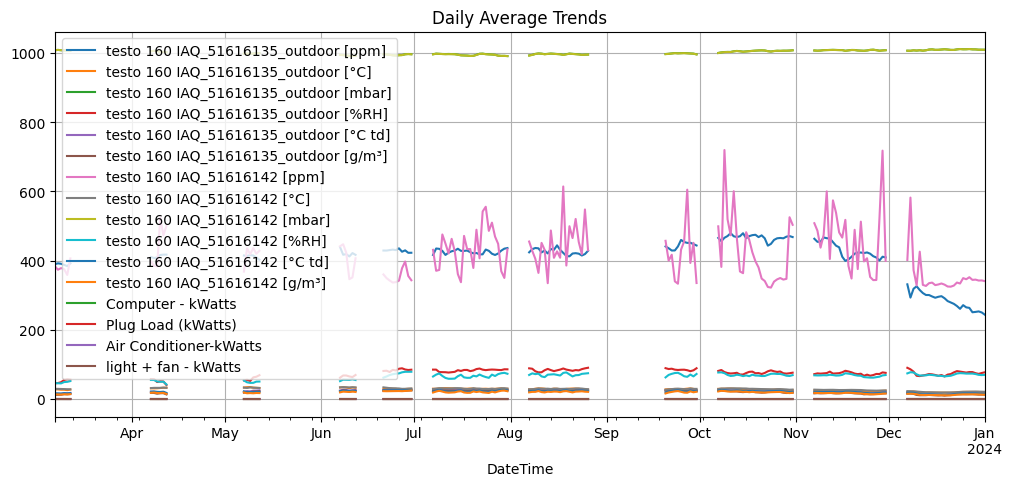

In [6]:
df.resample('D').mean().plot(figsize=(12, 5), title="Daily Average Trends")
plt.grid()
plt.show()


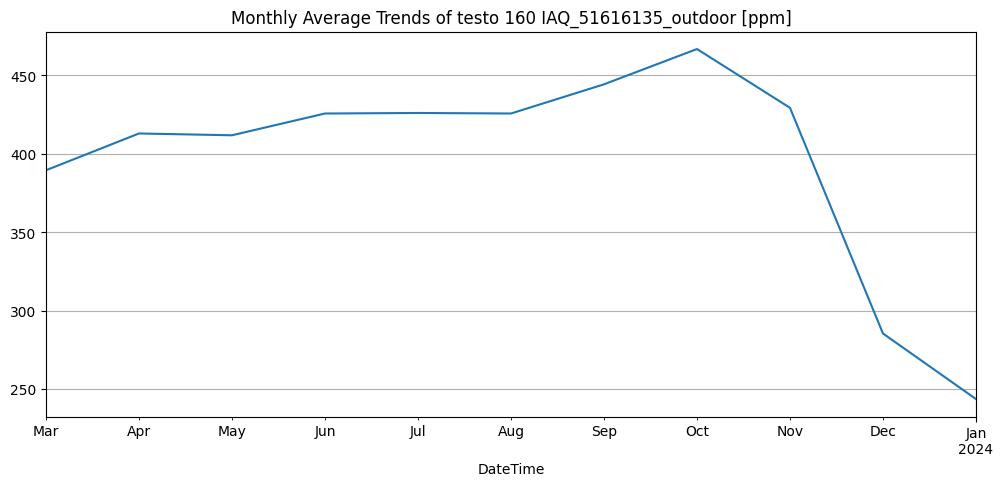

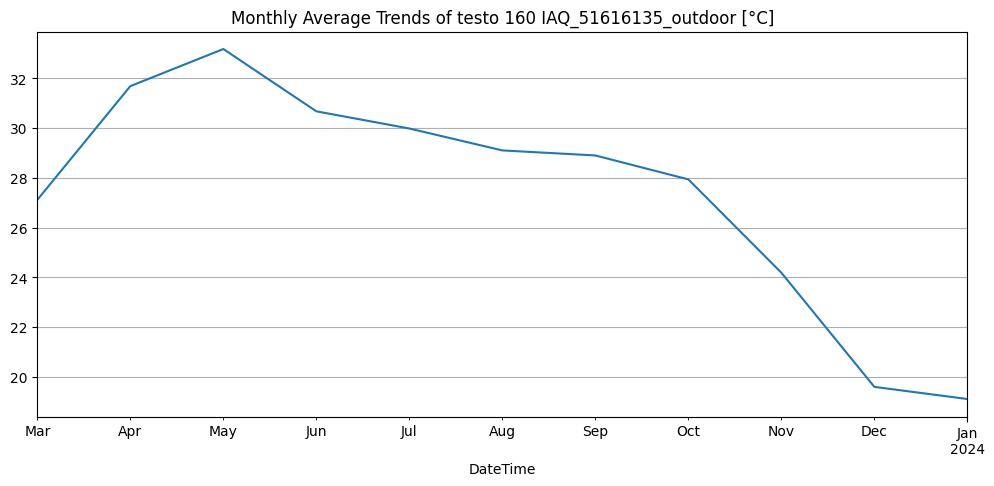

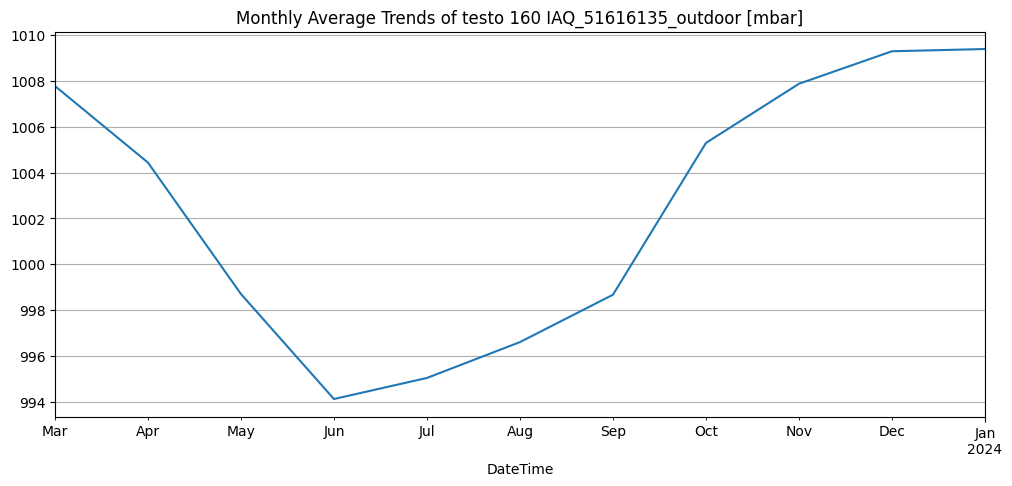

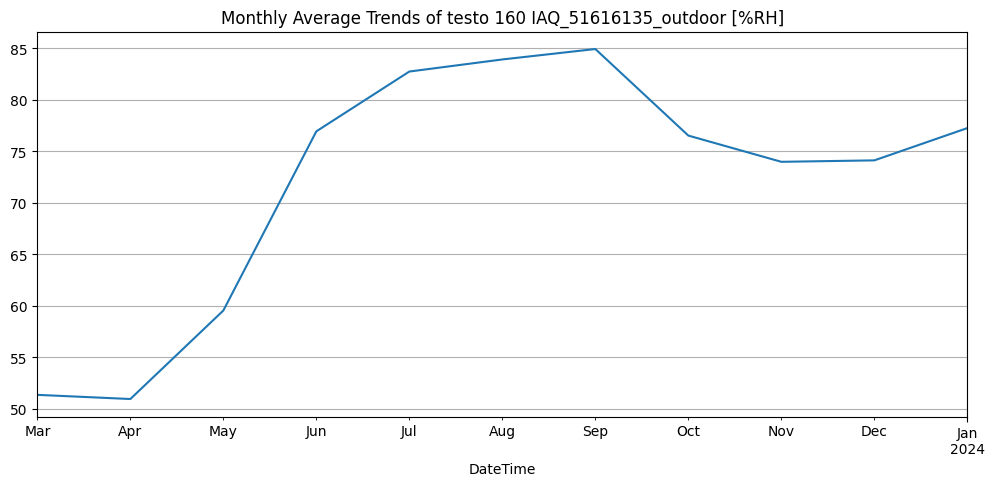

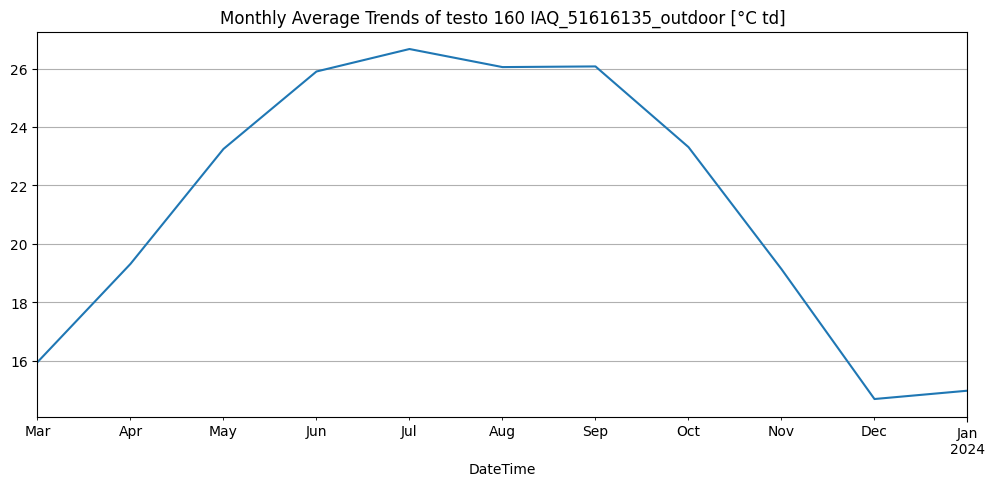

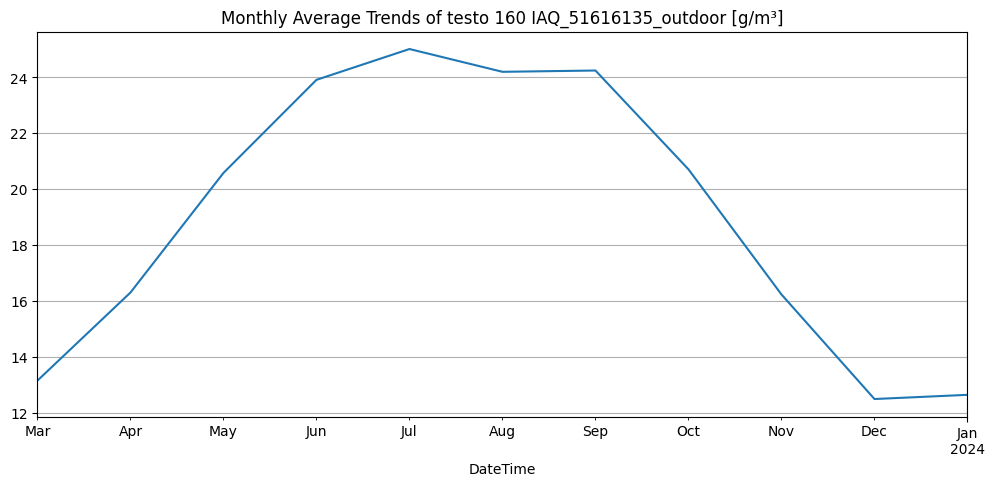

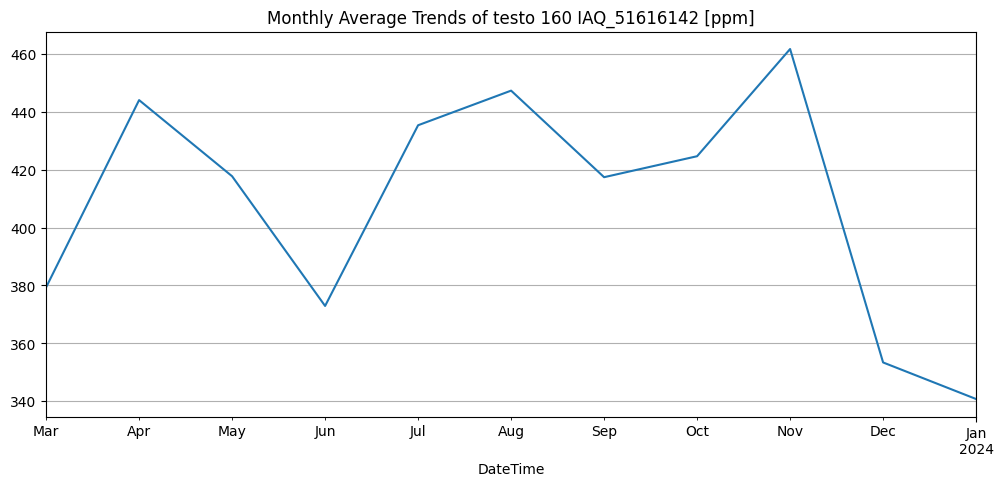

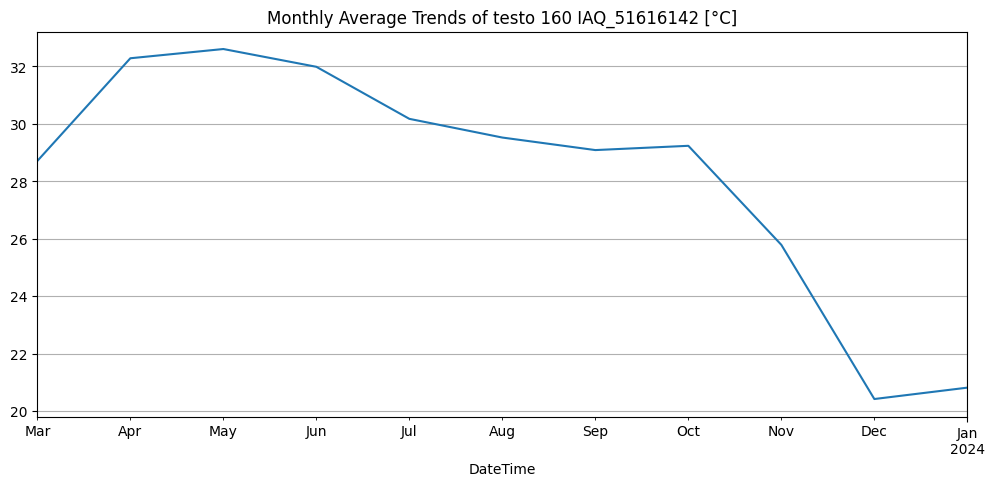

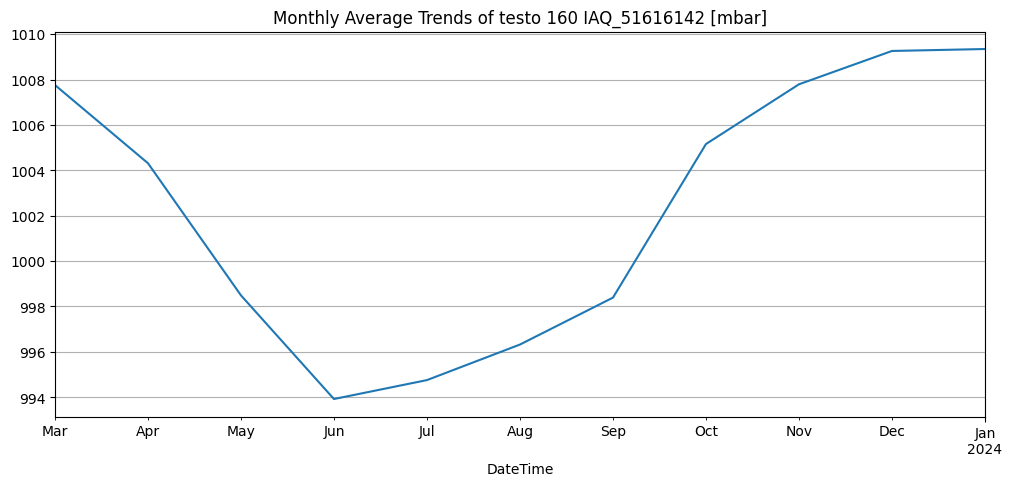

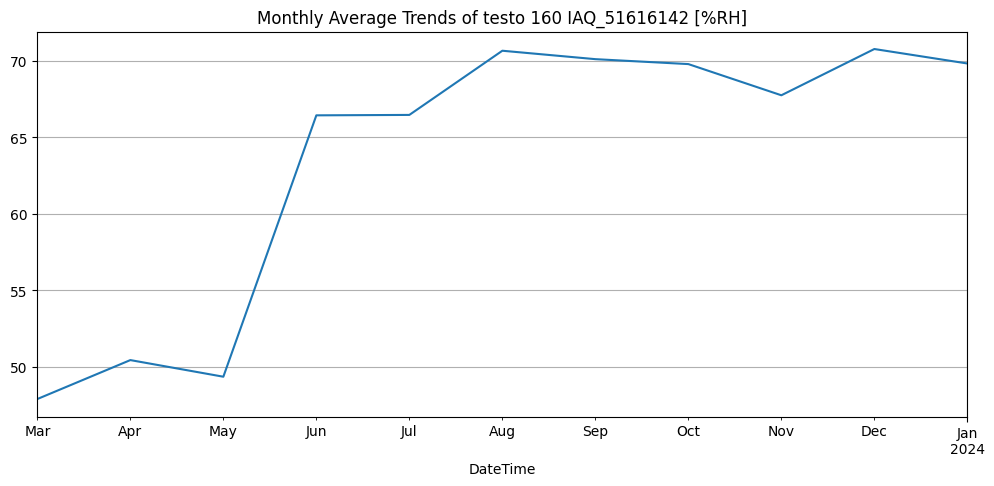

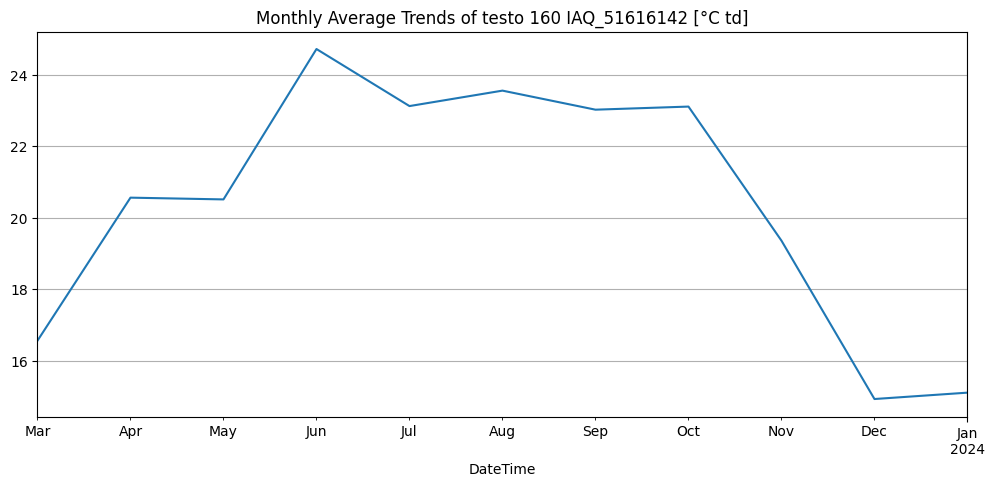

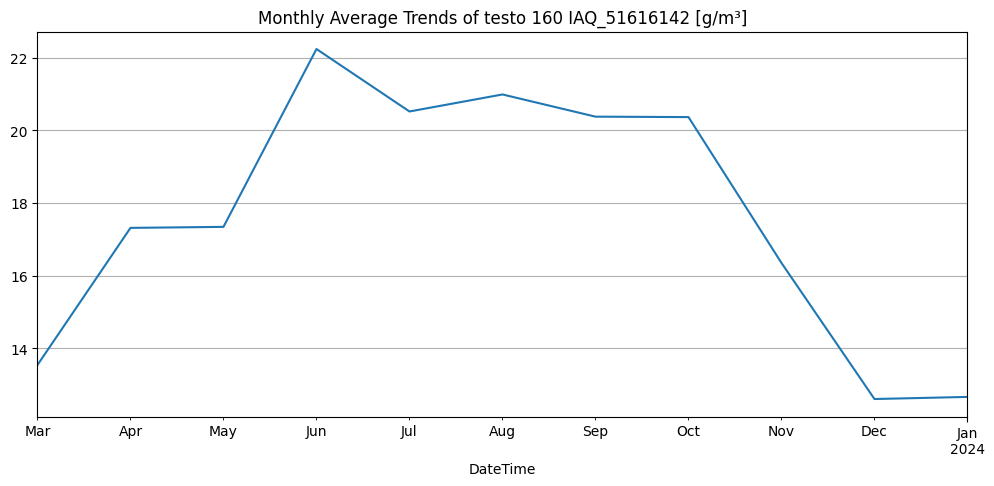

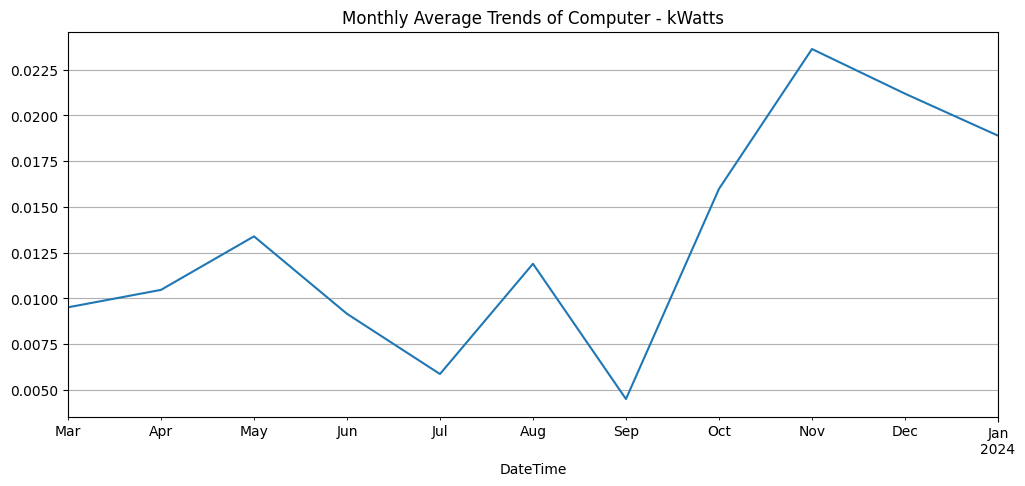

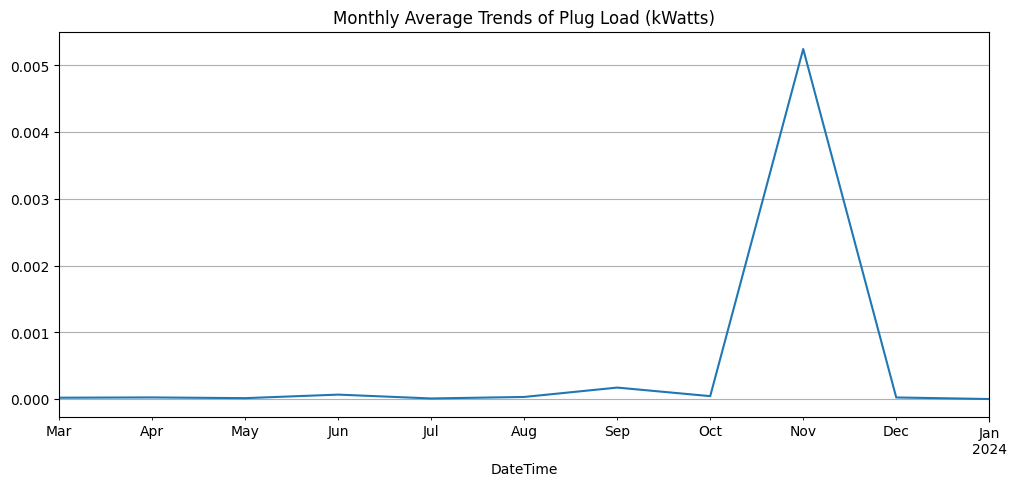

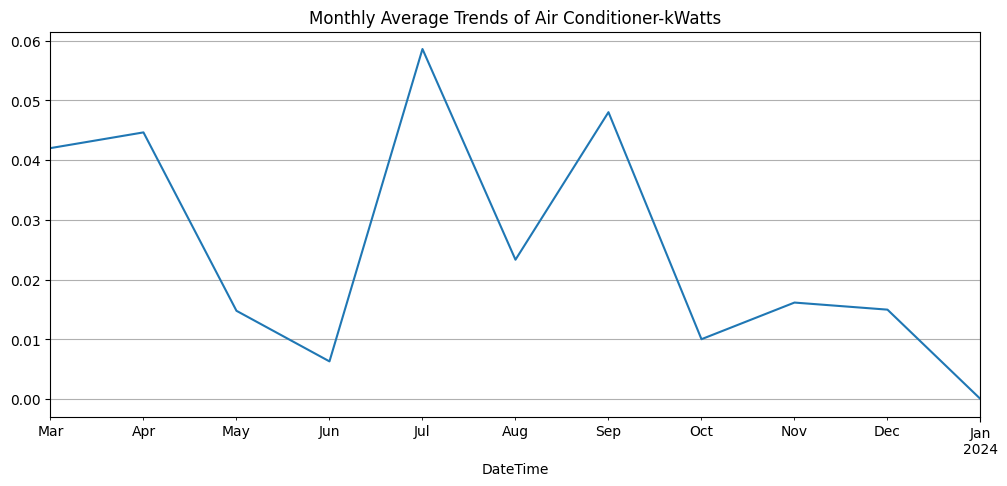

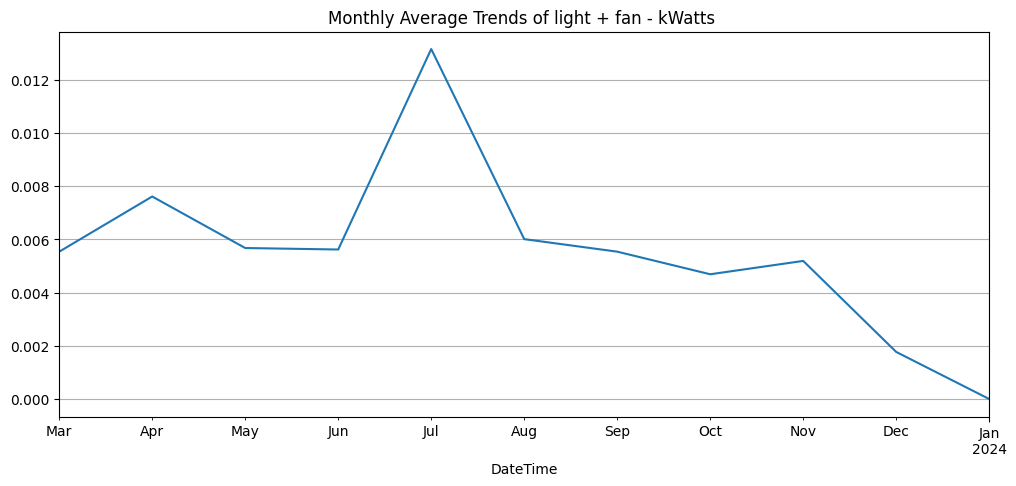

In [7]:
for col in df.columns:
    df[col].resample('M').mean().plot(figsize=(12, 5), title=f"Monthly Average Trends of {col}")
    plt.grid()
    plt.show()

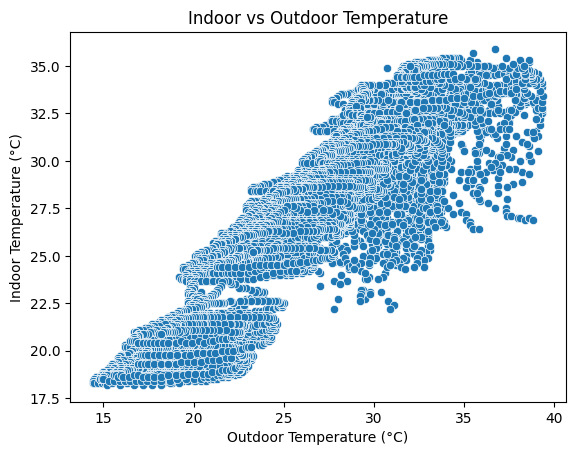

In [8]:
sns.scatterplot(data=df, x="testo 160 IAQ_51616135_outdoor [°C]", y="testo 160 IAQ_51616142 [°C]")
plt.title("Indoor vs Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°C)")
plt.ylabel("Indoor Temperature (°C)")
plt.show()

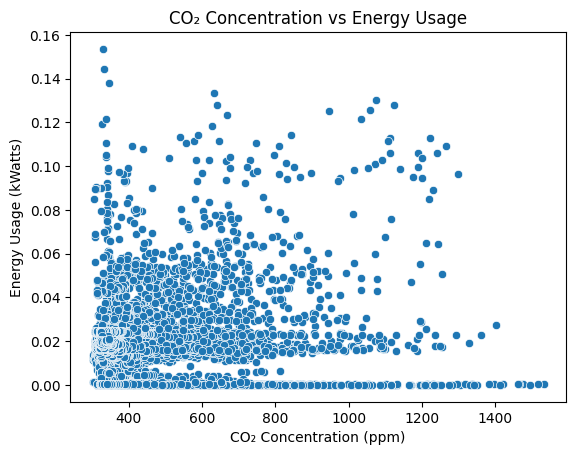

In [9]:
sns.scatterplot(data=df, x="testo 160 IAQ_51616142 [ppm]", y="Computer - kWatts")
plt.title("CO₂ Concentration vs Energy Usage")
plt.xlabel("CO₂ Concentration (ppm)")
plt.ylabel("Energy Usage (kWatts)")
plt.show()

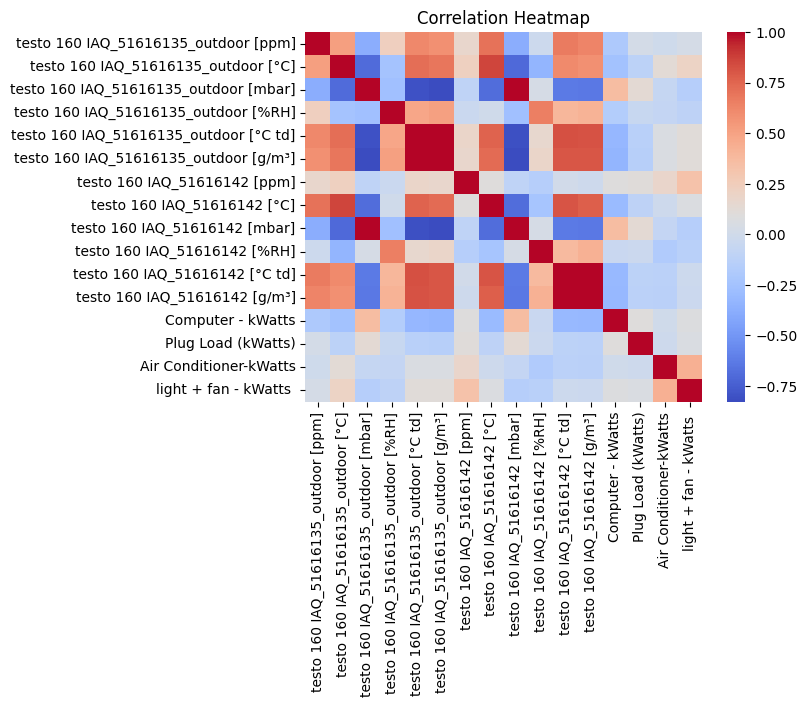

In [10]:
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1200x800 with 0 Axes>

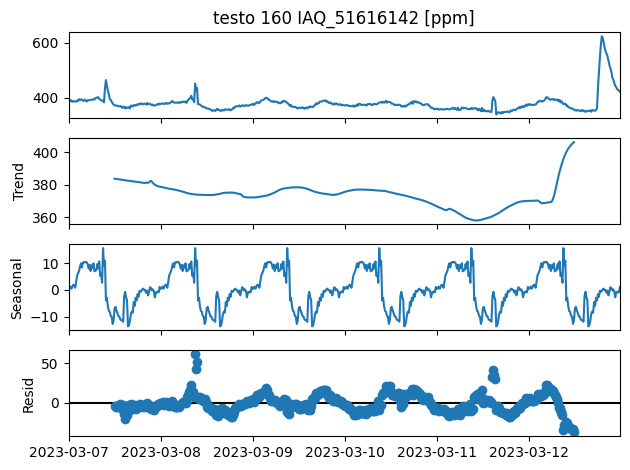

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_subset = df.loc['2023-03-07':'2023-03-14']  # Select a week
decomposed = seasonal_decompose(df_subset['testo 160 IAQ_51616142 [ppm]'].dropna(), model='additive', period=96)

plt.figure(figsize=(12, 8))
decomposed.plot()
plt.show()

In [12]:
df = pd.read_excel(f'CleanData/Merged.xlsx')

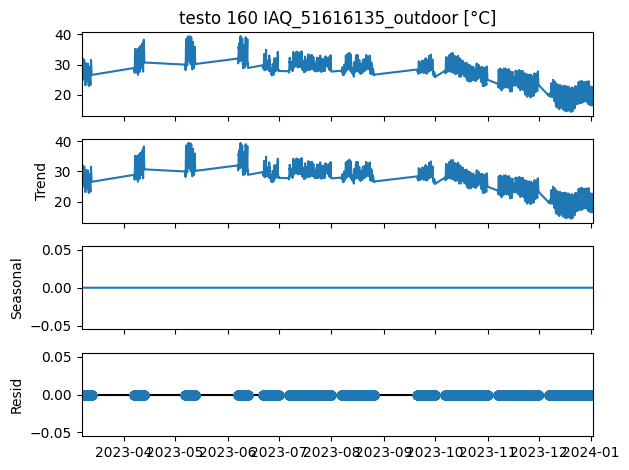

In [13]:

# Assuming 'df' is your DataFrame and it has a 'date' column and 'temperature' column

df.set_index('DateTime', inplace=True)
# Perform seasonal decomposition
result = seasonal_decompose(df['testo 160 IAQ_51616135_outdoor [°C]'], model='additive', period=1)

# Plot the decomposition
result.plot()
plt.show()

In [14]:
# Create Energy Demand column
df["Energy Demand"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

In [15]:
df

,testo 160 IAQ_51616135_outdoor [ppm],testo 160 IAQ_51616135_outdoor [°C],testo 160 IAQ_51616135_outdoor [mbar],testo 160 IAQ_51616135_outdoor [%RH],testo 160 IAQ_51616135_outdoor [°C td],testo 160 IAQ_51616135_outdoor [g/m³],testo 160 IAQ_51616142 [ppm],testo 160 IAQ_51616142 [°C],testo 160 IAQ_51616142 [mbar],testo 160 IAQ_51616142 [%RH],testo 160 IAQ_51616142 [°C td],testo 160 IAQ_51616142 [g/m³],Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Energy Demand
DateTime,,,,,,,,,,,,,,,,,
2023-03-07 00:00:00,399.0,26.5,1007,54.1,16.5,13.6,387.0,29.5,1008,47.4,17.1,14.0,0.0000,0.0,0.0,0.0,0.0000
2023-03-07 00:15:00,397.0,26.4,1007,53.5,16.2,13.3,387.0,29.4,1008,47.5,17.1,14.0,0.0000,0.0,0.0,0.0,0.0000
2023-03-07 00:30:00,401.0,26.3,1007,54.4,16.4,13.5,391.0,29.4,1008,47.5,17.1,14.0,0.0000,0.0,0.0,0.0,0.0000
2023-03-07 00:45:00,400.0,26.2,1007,53.5,16.0,13.2,389.0,29.4,1008,47.5,17.0,13.9,0.0000,0.0,0.0,0.0,0.0000
2023-03-07 01:00:00,402.0,26.2,1007,52.5,15.8,13.0,385.0,29.3,1008,47.3,17.0,13.9,0.0000,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01 22:45:00,243.0,18.2,1010,82.0,15.1,12.8,344.0,20.9,1010,70.5,15.4,12.9,0.0206,0.0,0.0,0.0,0.0206
2024-01-01 23:00:00,250.0,18.2,1010,82.0,15.1,12.8,338.0,20.9,1010,70.6,15.4,12.9,0.0207,0.0,0.0,0.0,0.0207
2024-01-01 23:15:00,255.0,18.1,1010,82.3,15.0,12.7,346.0,20.9,1010,70.6,15.4,12.9,0.0205,0.0,0.0,0.0,0.0205


In [16]:
for col in df.columns:
    print(col)

testo 160 IAQ_51616135_outdoor [ppm]
testo 160 IAQ_51616135_outdoor [°C]
testo 160 IAQ_51616135_outdoor [mbar]
testo 160 IAQ_51616135_outdoor [%RH]
testo 160 IAQ_51616135_outdoor [°C td]
testo 160 IAQ_51616135_outdoor [g/m³]
testo 160 IAQ_51616142 [ppm]
testo 160 IAQ_51616142 [°C]
testo 160 IAQ_51616142 [mbar]
testo 160 IAQ_51616142 [%RH]
testo 160 IAQ_51616142 [°C td]
testo 160 IAQ_51616142 [g/m³]
Computer - kWatts
Plug Load (kWatts)
Air Conditioner-kWatts
light + fan - kWatts 
Energy Demand


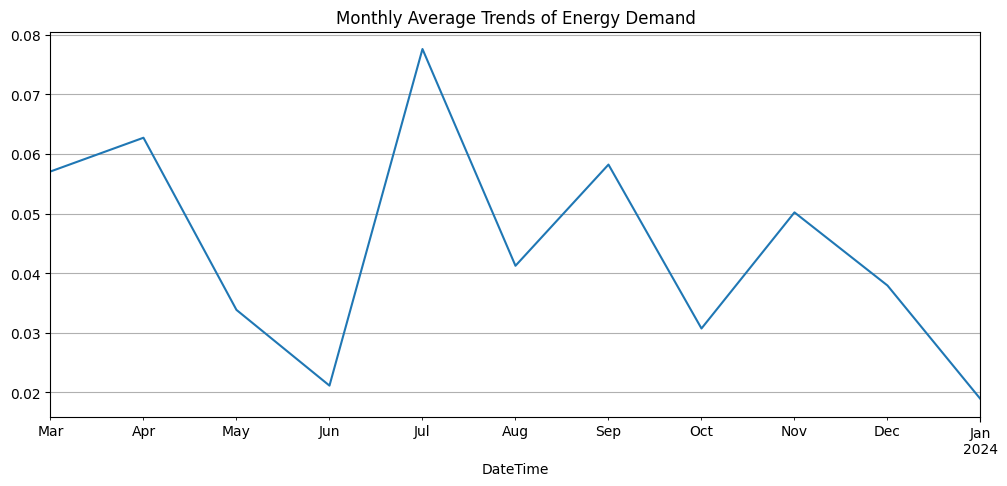

In [17]:
col = "Energy Demand"
df[col].resample('M').mean().plot(figsize=(12, 5), title=f"Monthly Average Trends of {col}")
plt.grid()
plt.show()

In [20]:

df = pd.read_excel(f'CleanData/Merged.xlsx')
# Create Energy Demand column
df["Energy Demand"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

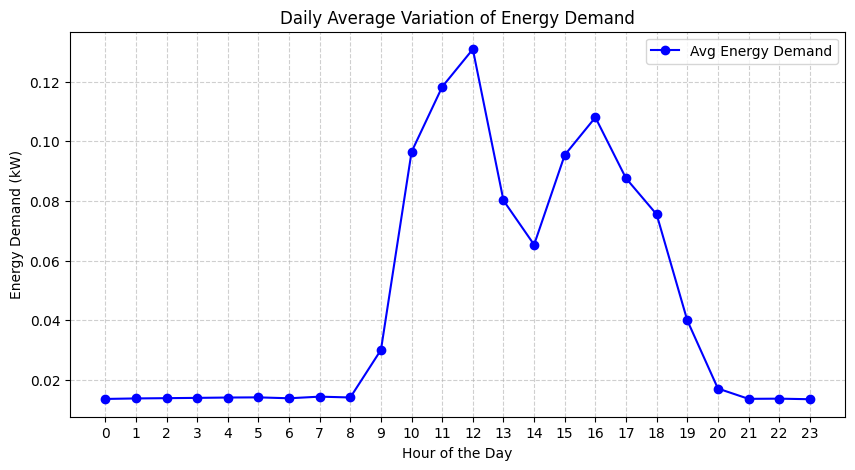

In [21]:

df["Hour"] = df["DateTime"].dt.hour

# Compute average energy demand per hour
hourly_avg = df.groupby("Hour")["Energy Demand"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linestyle='-', color='b', label="Avg Energy Demand")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Demand (kW)")
plt.title("Daily Average Variation of Energy Demand")
plt.xticks(range(24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

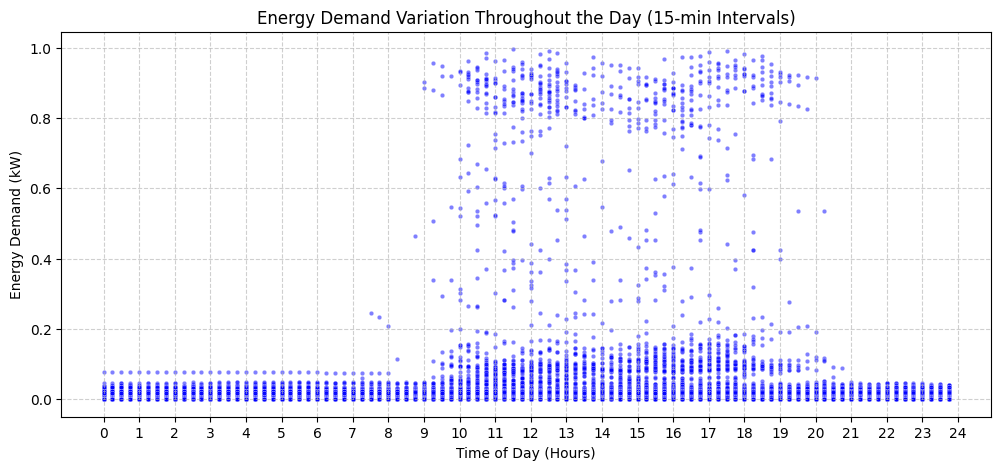

In [25]:


df["HourMinute"] = df["DateTime"].dt.hour + df["DateTime"].dt.minute / 60  # Convert to decimal hours

# Scatter plot
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df["HourMinute"], y=df["Energy Demand"], color='b', alpha=0.5, s=10)
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Energy Demand (kW)")
plt.title("Energy Demand Variation Throughout the Day (15-min Intervals)")
plt.xticks(np.arange(0, 25, 1))  # Tick marks every hour
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [27]:
df

,testo 160 IAQ_51616135_outdoor [ppm],testo 160 IAQ_51616135_outdoor [°C],testo 160 IAQ_51616135_outdoor [mbar],testo 160 IAQ_51616135_outdoor [%RH],testo 160 IAQ_51616135_outdoor [°C td],testo 160 IAQ_51616135_outdoor [g/m³],DateTime,testo 160 IAQ_51616142 [ppm],testo 160 IAQ_51616142 [°C],testo 160 IAQ_51616142 [mbar],testo 160 IAQ_51616142 [%RH],testo 160 IAQ_51616142 [°C td],testo 160 IAQ_51616142 [g/m³],Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Energy Demand,Hour,HourMinute
0,399.0,26.5,1007,54.1,16.5,13.6,2023-03-07 00:00:00,387.0,29.5,1008,47.4,17.1,14.0,0.0000,0.0,0.0,0.0,0.0000,0,0.00
1,397.0,26.4,1007,53.5,16.2,13.3,2023-03-07 00:15:00,387.0,29.4,1008,47.5,17.1,14.0,0.0000,0.0,0.0,0.0,0.0000,0,0.25
2,401.0,26.3,1007,54.4,16.4,13.5,2023-03-07 00:30:00,391.0,29.4,1008,47.5,17.1,14.0,0.0000,0.0,0.0,0.0,0.0000,0,0.50
3,400.0,26.2,1007,53.5,16.0,13.2,2023-03-07 00:45:00,389.0,29.4,1008,47.5,17.0,13.9,0.0000,0.0,0.0,0.0,0.0000,0,0.75
4,402.0,26.2,1007,52.5,15.8,13.0,2023-03-07 01:00:00,385.0,29.3,1008,47.3,17.0,13.9,0.0000,0.0,0.0,0.0,0.0000,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,243.0,18.2,1010,82.0,15.1,12.8,2024-01-01 22:45:00,344.0,20.9,1010,70.5,15.4,12.9,0.0206,0.0,0.0,0.0,0.0206,22,22.75
15610,250.0,18.2,1010,82.0,15.1,12.8,2024-01-01 23:00:00,338.0,20.9,1010,70.6,15.4,12.9,0.0207,0.0,0.0,0.0,0.0207,23,23.00
15611,255.0,18.1,1010,82.3,15.0,12.7,2024-01-01 23:15:00,346.0,20.9,1010,70.6,15.4,12.9,0.0205,0.0,0.0,0.0,0.0205,23,23.25
15612,256.0,18.1,1010,82.6,15.1,12.8,2024-01-01 23:30:00,346.0,20.9,1010,70.6,15.4,12.9,0.0206,0.0,0.0,0.0,0.0206,23,23.50


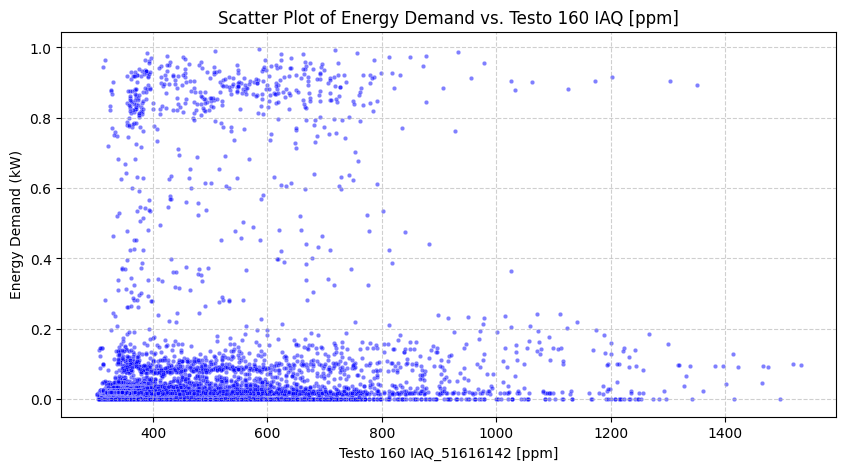

In [28]:

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["testo 160 IAQ_51616142 [ppm]"], y=df["Energy Demand"], color='b', alpha=0.5, s=10)
plt.xlabel("Testo 160 IAQ_51616142 [ppm]")
plt.ylabel("Energy Demand (kW)")
plt.title("Scatter Plot of Energy Demand vs. Testo 160 IAQ [ppm]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


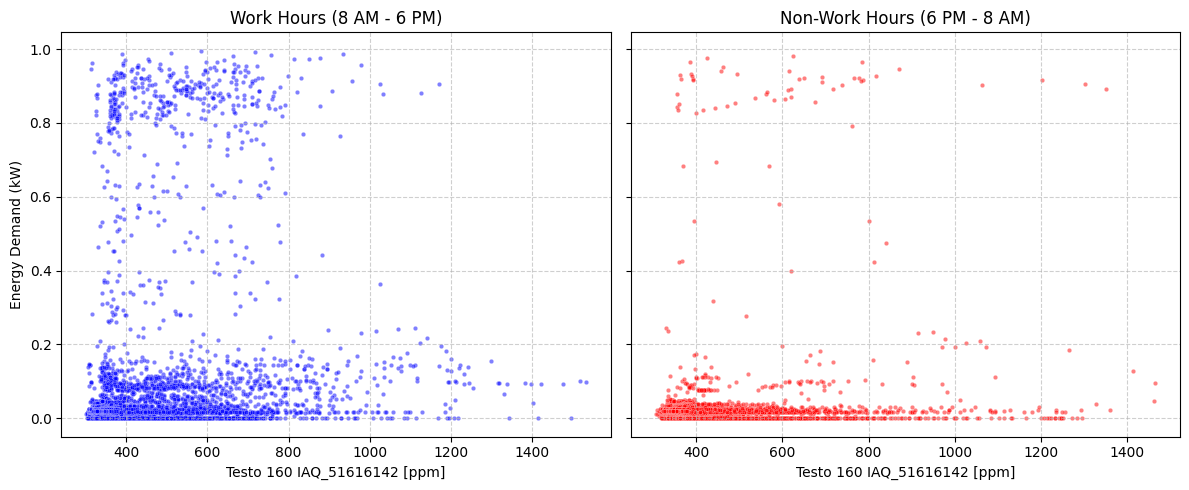

In [31]:

# Define work hours (8 AM to 6 PM)
df["Hour"] = df["DateTime"].dt.hour
df["WorkHour"] = ((df["Hour"] >= 8) & (df["Hour"] < 18)).astype(int)  # 1 for work hours, 0 otherwise

# Split data based on WorkHour
df_work = df[df["WorkHour"] == 1]
df_non_work = df[df["WorkHour"] == 0]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Work Hours Plot
sns.scatterplot(x=df_work["testo 160 IAQ_51616142 [ppm]"], y=df_work["Energy Demand"], 
                color='b', alpha=0.5, s=10, ax=axes[0])
axes[0].set_title("Work Hours (8 AM - 6 PM)")
axes[0].set_xlabel("Testo 160 IAQ_51616142 [ppm]")
axes[0].set_ylabel("Energy Demand (kW)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# Non-Work Hours Plot
sns.scatterplot(x=df_non_work["testo 160 IAQ_51616142 [ppm]"], y=df_non_work["Energy Demand"], 
                color='r', alpha=0.5, s=10, ax=axes[1])
axes[1].set_title("Non-Work Hours (6 PM - 8 AM)")
axes[1].set_xlabel("Testo 160 IAQ_51616142 [ppm]")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


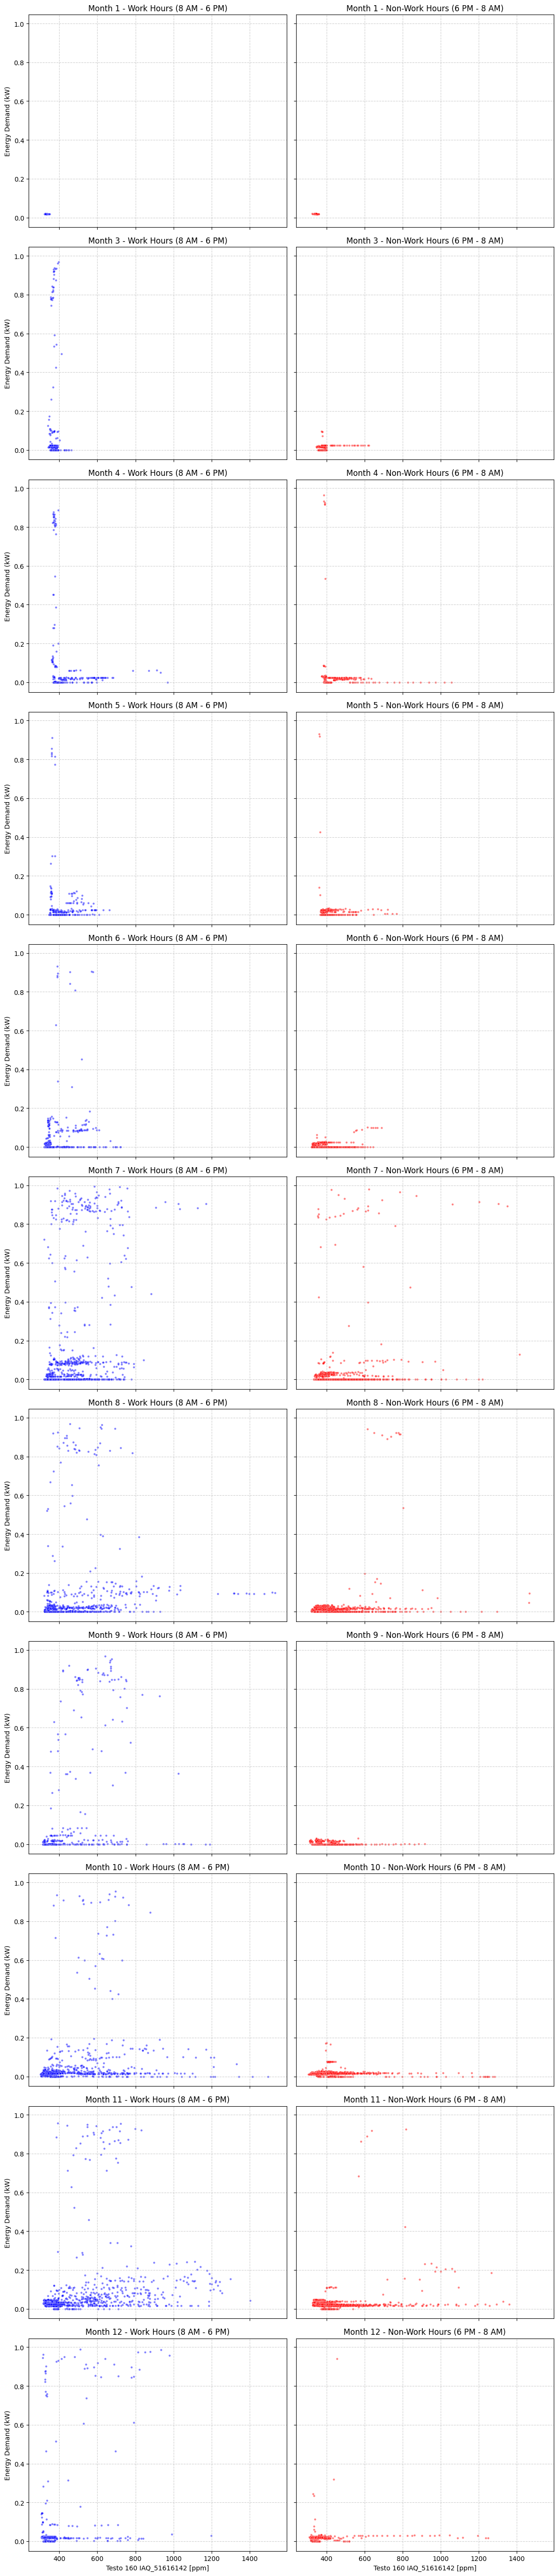

In [32]:

# Extract Month
df["Month"] = df["DateTime"].dt.month

# Get unique months
months = df["Month"].unique()
months.sort()

# Create subplots (one row for each month)
fig, axes = plt.subplots(len(months), 2, figsize=(12, 5 * len(months)), sharex=True, sharey=True)

for i, month in enumerate(months):
    df_month = df[df["Month"] == month]
    
    # Split data into work and non-work hours
    df_work = df_month[df_month["WorkHour"] == 1]
    df_non_work = df_month[df_month["WorkHour"] == 0]

    # Work Hours Plot
    sns.scatterplot(x=df_work["testo 160 IAQ_51616142 [ppm]"], y=df_work["Energy Demand"], 
                    color='b', alpha=0.5, s=10, ax=axes[i, 0])
    axes[i, 0].set_title(f"Month {month} - Work Hours (8 AM - 6 PM)")
    axes[i, 0].set_ylabel("Energy Demand (kW)")
    axes[i, 0].grid(True, linestyle="--", alpha=0.6)

    # Non-Work Hours Plot
    sns.scatterplot(x=df_non_work["testo 160 IAQ_51616142 [ppm]"], y=df_non_work["Energy Demand"], 
                    color='r', alpha=0.5, s=10, ax=axes[i, 1])
    axes[i, 1].set_title(f"Month {month} - Non-Work Hours (6 PM - 8 AM)")
    axes[i, 1].grid(True, linestyle="--", alpha=0.6)

# Set x-label for the last row
for ax in axes[-1]:
    ax.set_xlabel("Testo 160 IAQ_51616142 [ppm]")

plt.tight_layout()
plt.show()

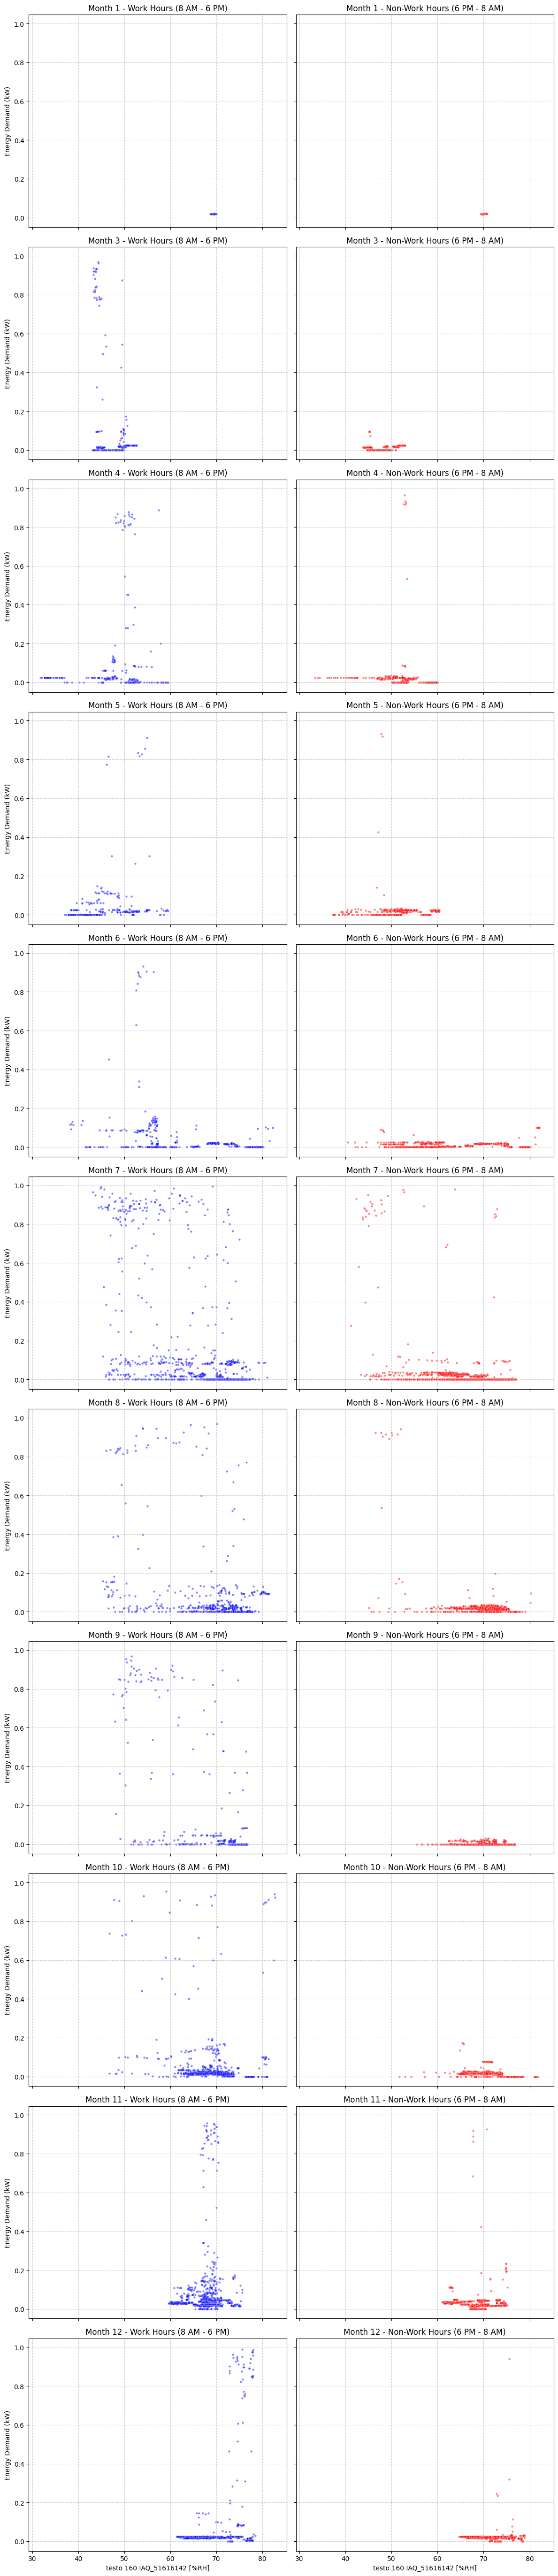

In [33]:

# Extract Month
df["Month"] = df["DateTime"].dt.month

# Get unique months
months = df["Month"].unique()
months.sort()

# Create subplots (one row for each month)
fig, axes = plt.subplots(len(months), 2, figsize=(12, 5 * len(months)), sharex=True, sharey=True)

for i, month in enumerate(months):
    df_month = df[df["Month"] == month]
    
    # Split data into work and non-work hours
    df_work = df_month[df_month["WorkHour"] == 1]
    df_non_work = df_month[df_month["WorkHour"] == 0]

    # Work Hours Plot
    sns.scatterplot(x=df_work["testo 160 IAQ_51616142 [%RH]"], y=df_work["Energy Demand"], 
                    color='b', alpha=0.5, s=10, ax=axes[i, 0])
    axes[i, 0].set_title(f"Month {month} - Work Hours (8 AM - 6 PM)")
    axes[i, 0].set_ylabel("Energy Demand (kW)")
    axes[i, 0].grid(True, linestyle="--", alpha=0.6)

    # Non-Work Hours Plot
    sns.scatterplot(x=df_non_work["testo 160 IAQ_51616142 [%RH]"], y=df_non_work["Energy Demand"], 
                    color='r', alpha=0.5, s=10, ax=axes[i, 1])
    axes[i, 1].set_title(f"Month {month} - Non-Work Hours (6 PM - 8 AM)")
    axes[i, 1].grid(True, linestyle="--", alpha=0.6)

# Set x-label for the last row
for ax in axes[-1]:
    ax.set_xlabel("testo 160 IAQ_51616142 [%RH]")

plt.tight_layout()
plt.show()

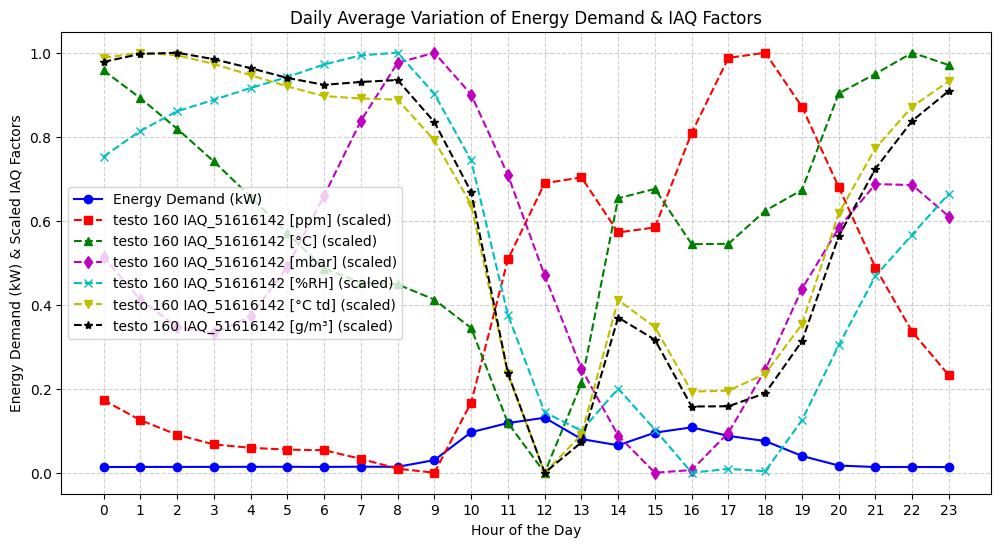

In [ ]:

# Compute hourly averages
hourly_avg = df.groupby("Hour").mean()

# Normalize IAQ factors using Min-Max scaling
iaq_columns = [
    "testo 160 IAQ_51616142 [ppm]", 
    "testo 160 IAQ_51616142 [°C]", 
    "testo 160 IAQ_51616142 [mbar]", 
    "testo 160 IAQ_51616142 [%RH]", 
    "testo 160 IAQ_51616142 [°C td]", 
    "testo 160 IAQ_51616142 [g/m³]"
]
normalized_iaq = (hourly_avg[iaq_columns] - hourly_avg[iaq_columns].min()) / (hourly_avg[iaq_columns].max() - hourly_avg[iaq_columns].min())

# Plot
plt.figure(figsize=(12, 6))

# Energy Demand
plt.plot(hourly_avg.index, hourly_avg["Energy Demand"], marker='o', linestyle='-', color='b', label="Energy Demand (kW)")

# IAQ Factors (Scaled)
for col, color, marker in zip(iaq_columns, ['r', 'g', 'm', 'c', 'y', 'k'], ['s', '^', 'd', 'x', 'v', '*']):
    plt.plot(hourly_avg.index, normalized_iaq[col], marker=marker, linestyle='--', color=color, label=col + " (scaled)")

# Labels & Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Demand (kW) & Scaled IAQ Factors")
plt.title("Daily Average Variation of Energy Demand & IAQ Factors")
plt.xticks(range(24))
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()